<a href="https://colab.research.google.com/github/IzanPereira/Modelo-de-previs-o-para-Hackathon/blob/main/Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Etapa 1
Extraindo e Coletando amostra, explorando com gráfico para ter ideias

In [ ]:
# Definindo o caminho para o arquivo zip
zip_file <- "/content/hackathon_2025_templates.zip"
zip_file1 <- "/content/df.zip"

# Definindo o diretório de destino para a extração
dest_dir <- "/content/"

# Extraindo o conteúdo do arquivo zip
unzip(zip_file, exdir = dest_dir)
unzip(zip_file1, exdir = dest_dir)

In [ ]:
install.packages("arrow") #instalando biblioteca de leitura
install.packages("caret")
install.packages("xgboost")
install.packages("tidyverse") #instalando biblioteca de manipulação
install.packages ("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘assertthat’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
# Carregando os pacotes para a sessão
library(arrow)
library(tidyverse)
library(ggplot2)
library(shiny)
library(forecast)
library(dplyr)
library(lubridate)
library(forcats)


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::duration() masks arrow::duration()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::lag()          masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



# Abrindo o Dataset

In [ ]:
ds_pdv <- open_dataset("part-00000-tid-2779033056155408584-f6316110-4c9a-4061-ae48-69b77c7c8c36-4-1-c000.snappy.parquet")

In [ ]:
glimpse(ds_pdv)

FileSystemDataset with 1 Parquet file
14,419 rows x 4 columns
$ pdv           <string> "2204965430669363375", "5211957289528622910", "90244935…
$ premise       <string> "On Premise", "On Premise", "Off Premise", "On Premise"…
$ categoria_pdv <string> "Mexican Rest", "Hotel/Motel", "Convenience", "Restaura…
$ zipcode        <int32> 30741, 80011, 80751, 80439, 30093, 80906, 30721, 80205,…
Call `print()` for full schema details


In [ ]:
is.na(ds_pdv)

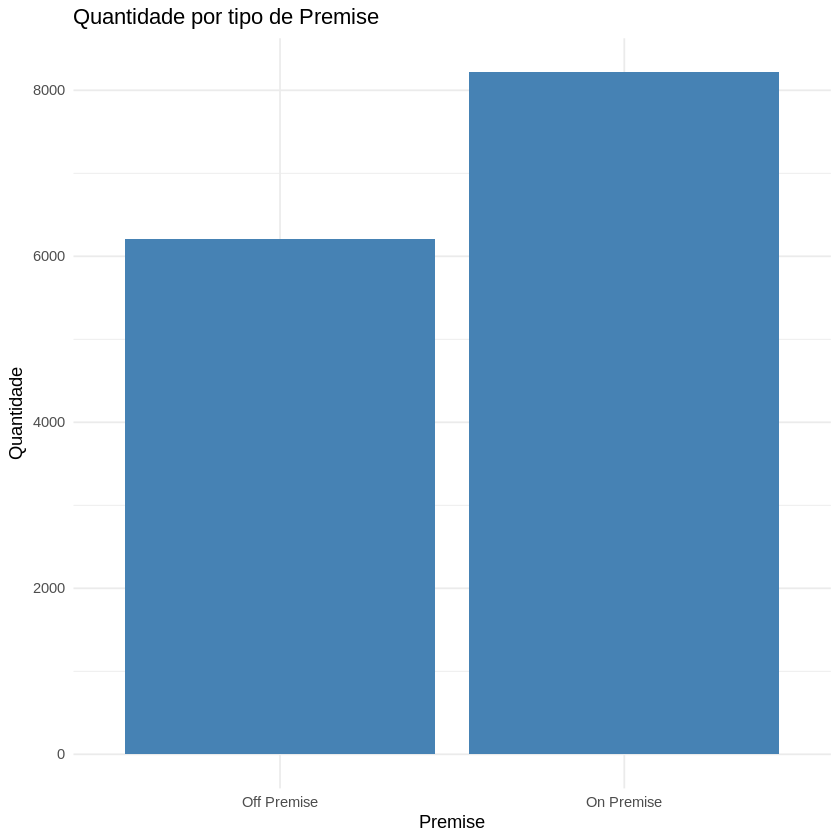

In [ ]:
ggplot(ds_pdv, aes(x = premise)) +
  geom_bar(fill = "steelblue") +
  labs(title = "Quantidade por tipo de Premise",
       x = "Premise",
       y = "Quantidade") +
  theme_minimal()

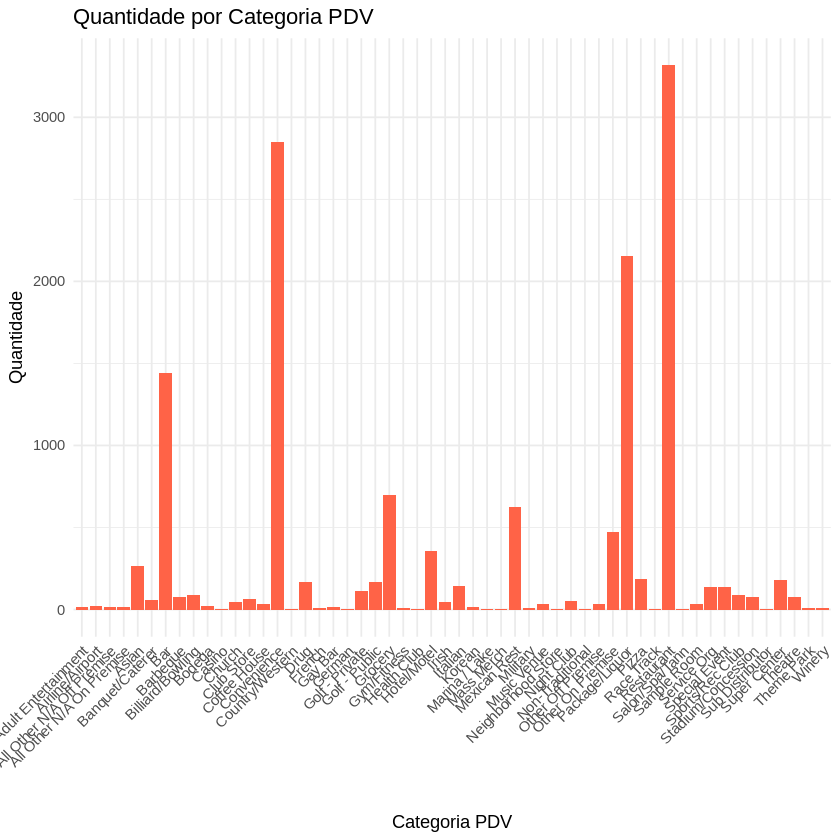

In [ ]:
ggplot(ds_pdv, aes(x = categoria_pdv)) +
  geom_bar(fill = "tomato") +
  labs(title = "Quantidade por Categoria PDV",
       x = "Categoria PDV",
       y = "Quantidade") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

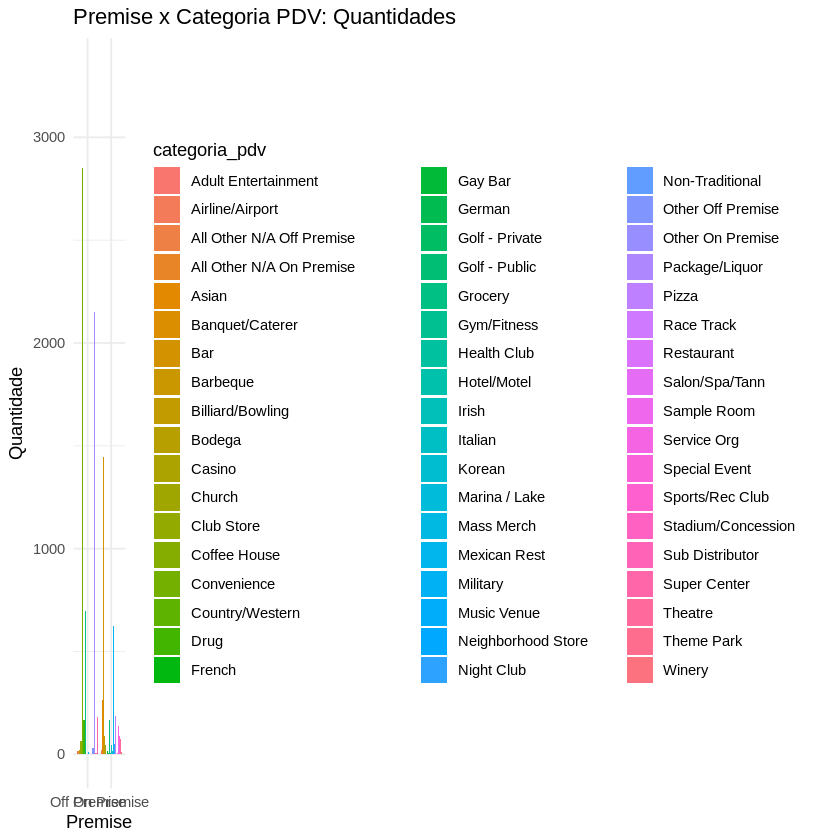

In [ ]:
ggplot(ds_pdv, aes(x = premise, fill = categoria_pdv)) +
  geom_bar(position = "dodge") +
  labs(title = "Premise x Categoria PDV: Quantidades",
       x = "Premise",
       y = "Quantidade") +
  theme_minimal()

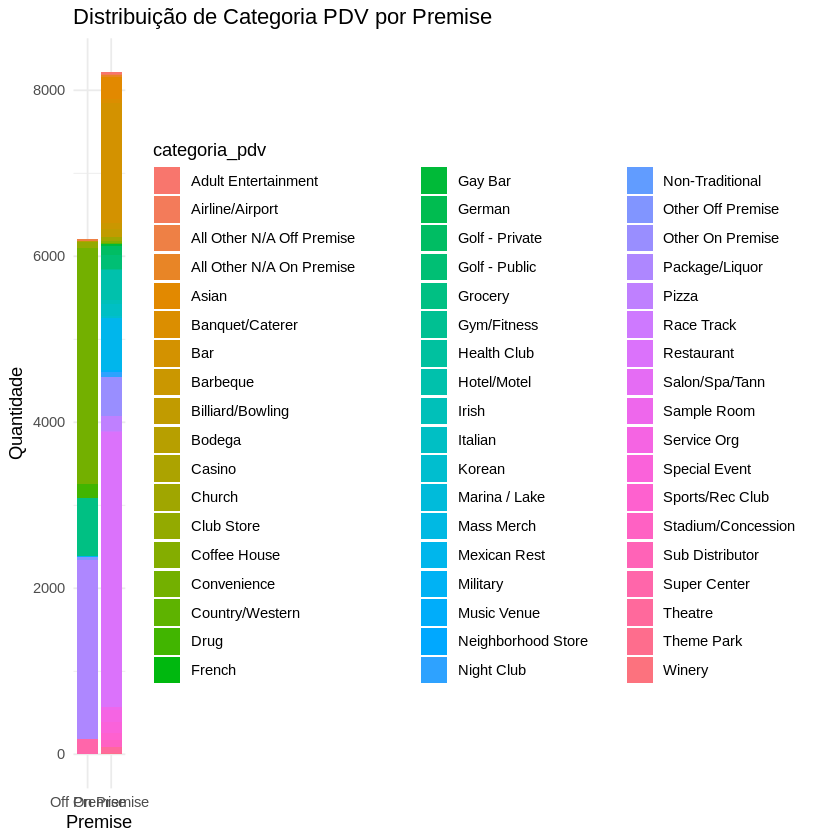

In [ ]:
ggplot(ds_pdv, aes(x = premise, fill = categoria_pdv)) +
  geom_bar(position = "stack") +
  labs(title = "Distribuição de Categoria PDV por Premise",
       x = "Premise",
       y = "Quantidade") +
  theme_minimal()

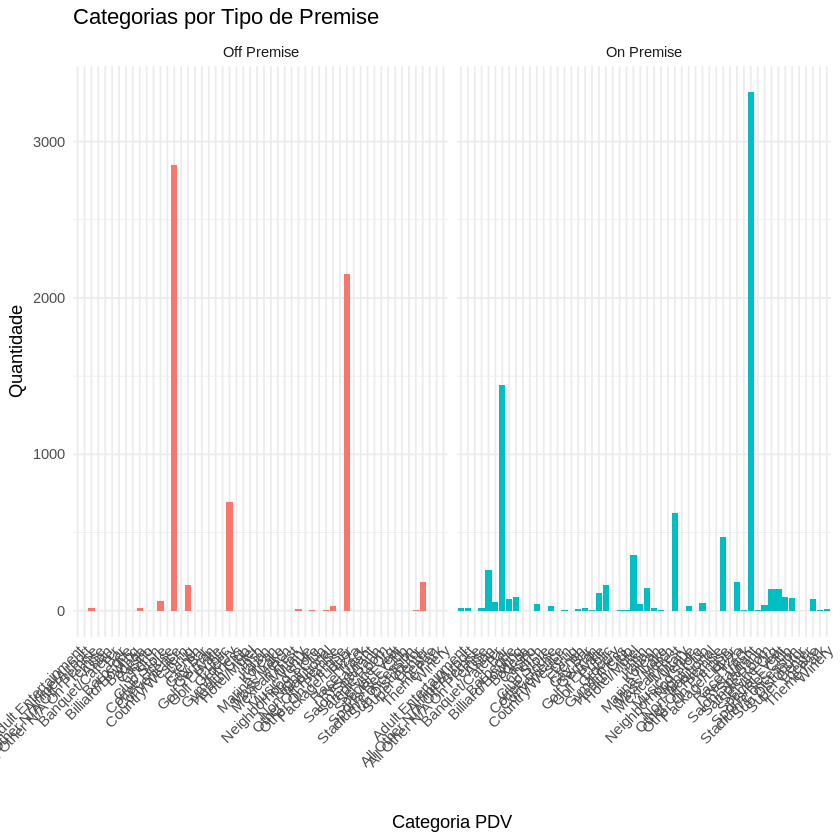

In [ ]:
ggplot(ds_pdv, aes(x = categoria_pdv, fill = premise)) +
  geom_bar(show.legend = FALSE) +
  facet_wrap(~premise) +
  labs(title = "Categorias por Tipo de Premise",
       x = "Categoria PDV", y = "Quantidade") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

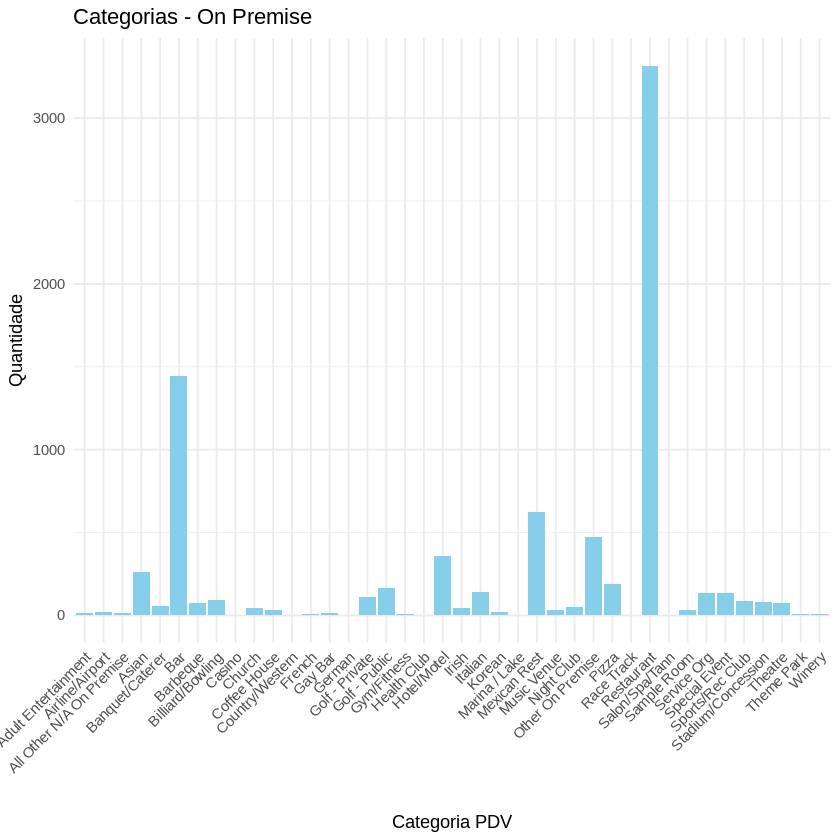

In [ ]:
ds_on <- ds_pdv |> filter(premise == "On Premise") |> collect()
ggplot(ds_on, aes(x = categoria_pdv)) +
  geom_bar(fill = "skyblue") +
  labs(title = "Categorias - On Premise",
       x = "Categoria PDV", y = "Quantidade") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

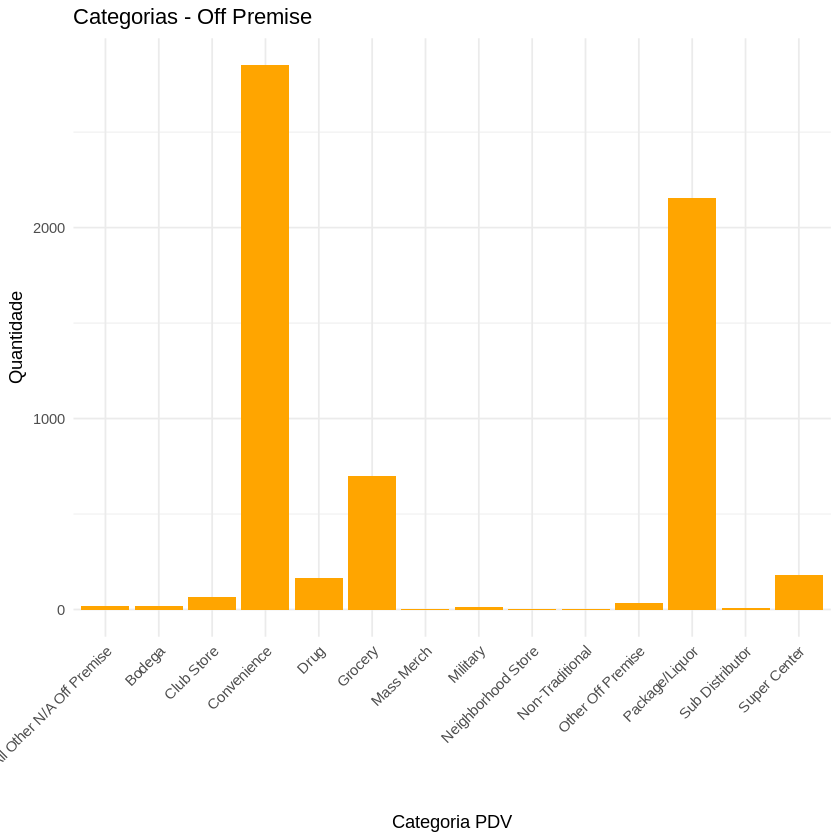

In [ ]:
ds_off <- ds_pdv |> filter(premise == "Off Premise")|> collect()
ggplot(ds_off, aes(x = categoria_pdv)) +
  geom_bar(fill = "orange") +
  labs(title = "Categorias - Off Premise",
       x = "Categoria PDV", y = "Quantidade") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

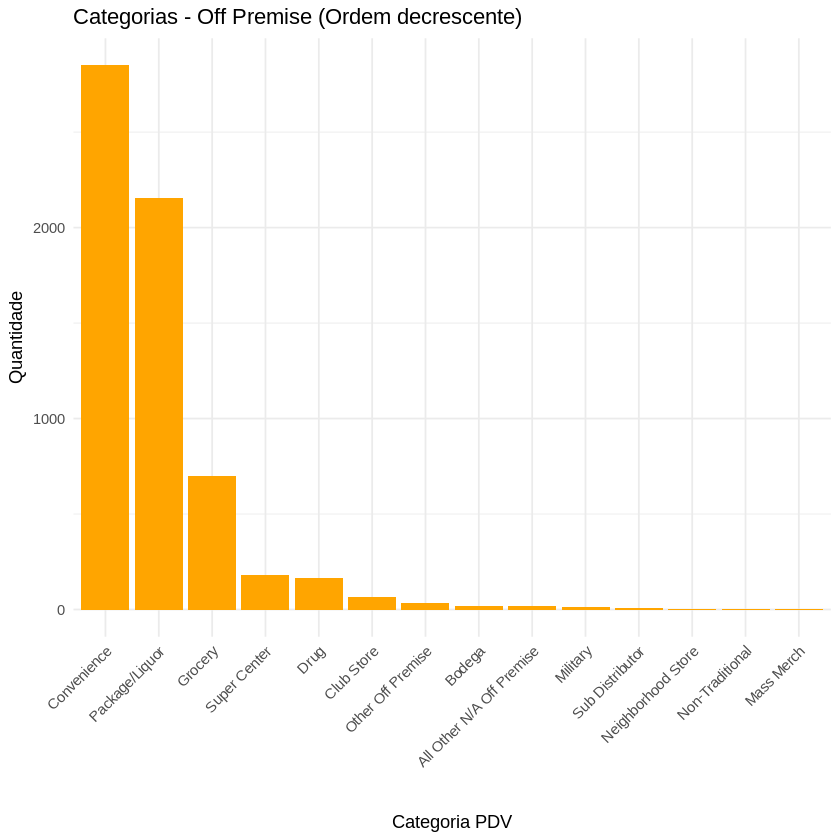

In [ ]:
ds_off <- ds_pdv |> filter(premise == "Off Premise") |> collect()

ggplot(ds_off, aes(x = fct_infreq(categoria_pdv))) +
  geom_bar(fill = "orange") +
  labs(title = "Categorias - Off Premise (Ordem decrescente)",
       x = "Categoria PDV", y = "Quantidade") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

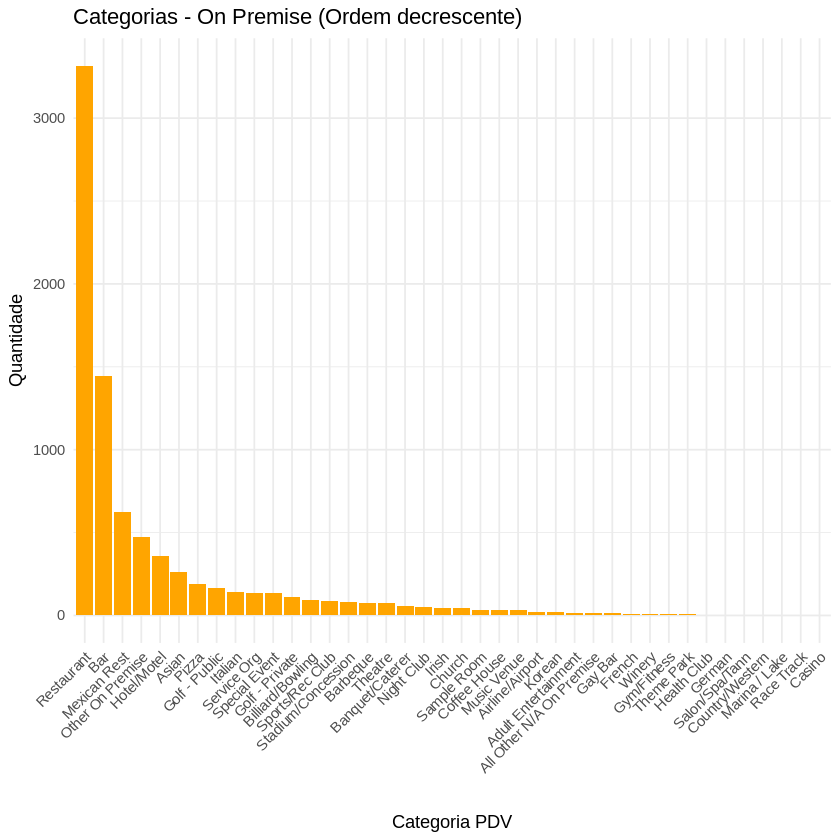

In [ ]:
ds_on <- ds_pdv |> filter(premise == "On Premise")|> collect()

ggplot(ds_on, aes(x = fct_infreq(categoria_pdv))) +
  geom_bar(fill = "orange") +
  labs(title = "Categorias - On Premise (Ordem decrescente)",
       x = "Categoria PDV", y = "Quantidade") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
ds_Transações <- open_dataset("part-00000-tid-5196563791502273604-c90d3a24-52f2-4955-b4ec-fb143aae74d8-4-1-c000.snappy.parquet")

In [ ]:
glimpse(ds_Transações)

FileSystemDataset with 1 Parquet file
6,560,698 rows x 11 columns
$ internal_store_id     <string> "7384367747233276219", "3536908514005606262", "…
$ internal_product_id   <string> "328903483604537190", "5418855670645487653", "1…
$ distributor_id        <string> "9", "5", "6", "5", "4", "10", "4", "5", "4", "…
$ transaction_date <date32[day]> 2022-07-13, 2022-03-21, 2022-09-06, 2022-09-11,…
$ reference_date   <date32[day]> 2022-07-01, 2022-03-01, 2022-09-01, 2022-09-01,…
$ quantity              <double> 1.00000, 6.00000, 3.00000, 129.00000, 1.00000, …
$ gross_value           <double> 38.1250, 107.2500, 56.6250, 1037.1600, 26.2300,…
$ net_value             <double> 37.89062, 106.44000, 56.22000, 1037.16002, 23.9…
$ gross_profit          <double> 10.042625, 24.732002, 14.124002, 156.348026, 6.…
$ discount              <double> 3.95000, 17.10000, 5.25000, 479.88001, 0.00000,…
$ taxes                 <double> 0.234375, 0.810000, 0.405000, 0.000000, 2.27975…
Call `print()` for full schema d

In [ ]:
is.na(ds_Transações)

Warning message in is.na(ds_Transações):
“is.na() applied to non-(list or vector) of type 'environment'”


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

Agrupando para dar uma visão melhor

In [ ]:
vendas_diarias <- ds_Transações |>
  group_by(transaction_date) |>
  summarise(total_quantity = sum(quantity, na.rm = TRUE)) |>
  ungroup()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




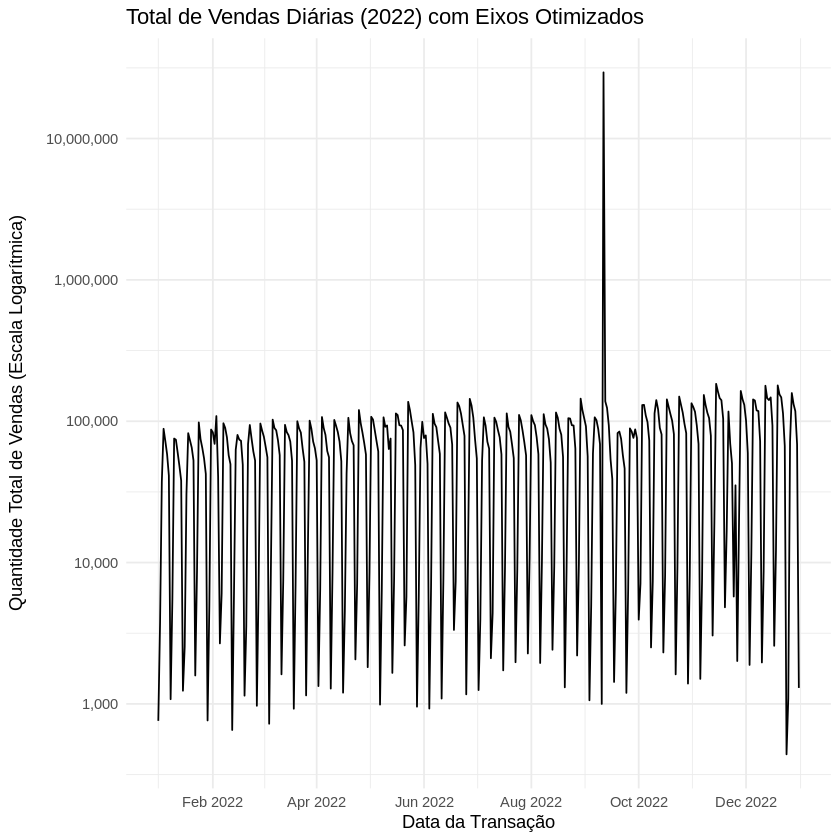

In [ ]:
library(scales) # Certifique-se de que este pacote está carregado

ggplot(vendas_diarias |> collect(), aes(x = transaction_date, y = total_quantity)) +
  geom_line() +
  labs(title = "Total de Vendas Diárias (2022) com Eixos Otimizados",
       x = "Data da Transação",
       y = "Quantidade Total de Vendas (Escala Logarítmica)") +
  # Formata o eixo Y com escala logarítmica e rótulos com vírgulas
  scale_y_log10(labels = scales::comma) +
  # Formata o eixo X para que as datas não se sobreponham
  scale_x_date(date_breaks = "2 months", date_labels = "%b %Y") +
  # Tema minimalista
  theme_minimal()

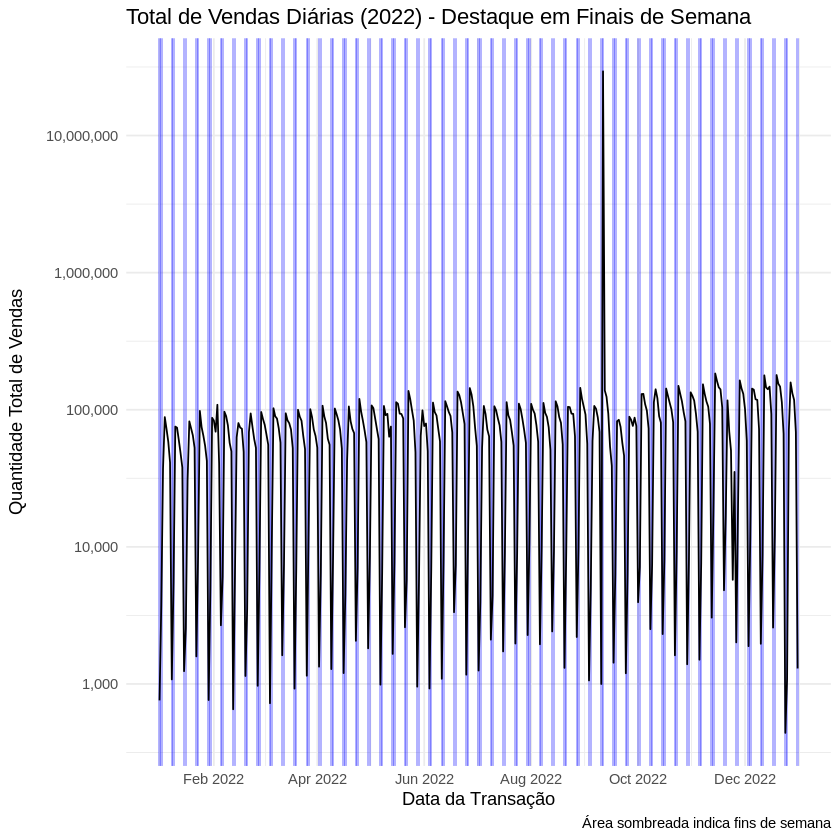

In [ ]:
#Analizando o finais de semanas e seus impactos nas vendas
vendas_diarias <- vendas_diarias |>
  mutate(dia_da_semana = wday(transaction_date, week_start = 1))

# Criando DataFrame que contém apenas os finais de semana
df_finaisdesemana <- vendas_diarias |>
  filter(dia_da_semana %in% c(6, 7))

ggplot(vendas_diarias |> collect(), aes(x = transaction_date, y = total_quantity)) +

  # Utilizando o DataFrame 'df_finaisdesemana' para a camada de retângulos
  geom_rect(data = df_finaisdesemana |> collect(), aes(xmin = transaction_date - 0.7, xmax = transaction_date + 0.7),
            ymin = -Inf, ymax = Inf, fill = "blue", alpha = 0.3) +

  geom_line() +

  labs(title = "Total de Vendas Diárias (2022) - Destaque em Finais de Semana",
       x = "Data da Transação",
       y = "Quantidade Total de Vendas",
       caption = "Área sombreada indica fins de semana") +

  scale_y_log10(labels = scales::comma) +
  scale_x_date(date_breaks = "2 months", date_labels = "%b %Y") +
  theme_minimal()

Há uma queda acentuada nas vendas nos finais de semana, visto que, devido a ser varejo, alguns estabelecimentos não operam ou não a procura.

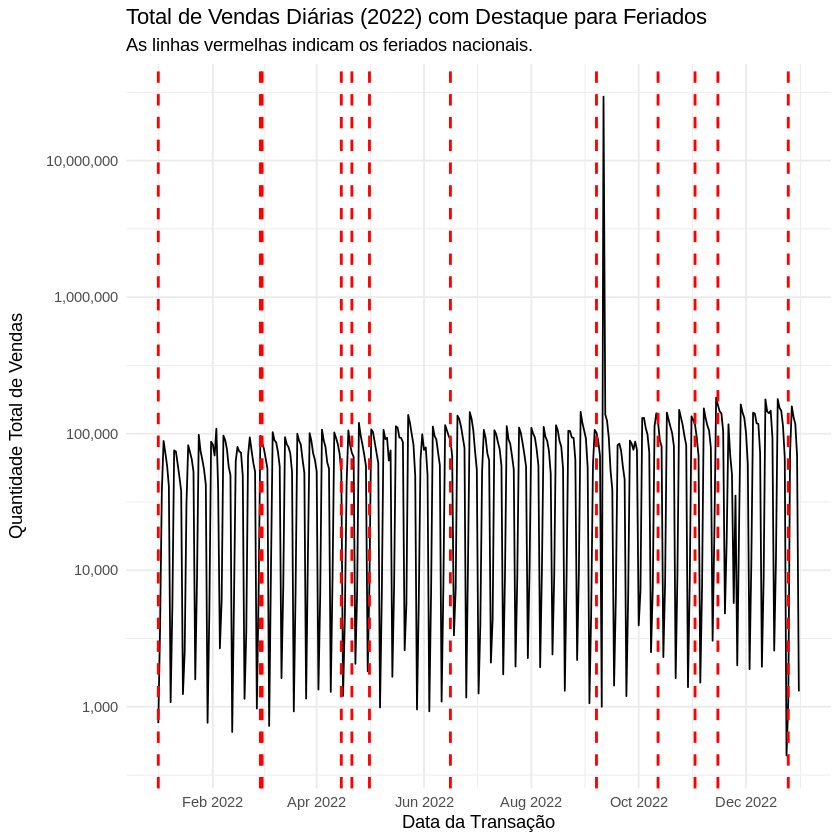

In [ ]:
#Analisando os feriados e seu impacto nas vendas
feriados_2022 <- as.Date(c(
  "2022-01-01", "2022-02-28", "2022-03-01", "2022-04-15",
  "2022-04-21", "2022-05-01", "2022-06-16", "2022-09-07",
  "2022-10-12", "2022-11-02", "2022-11-15", "2022-12-25"
))

ggplot(vendas_diarias |> collect(), aes(x = transaction_date, y = total_quantity)) +
  geom_line() +
  geom_vline(xintercept = feriados_2022, color = "red", linetype = "dashed", linewidth = 0.8) +
  labs(title = "Total de Vendas Diárias (2022) com Destaque para Feriados",
       subtitle = "As linhas vermelhas indicam os feriados nacionais.",
       x = "Data da Transação",
       y = "Quantidade Total de Vendas") +
  scale_y_log10(labels = scales::comma) +
  scale_x_date(date_breaks = "2 months", date_labels = "%b %Y") +
  theme_minimal()

Assim como ocorre nos finais de semanas, em dias que tem feriado a venda despenca, o que também pode apresentar que, ou o estabelicimento não abre ou possui um horário reduzido de funcionamento.

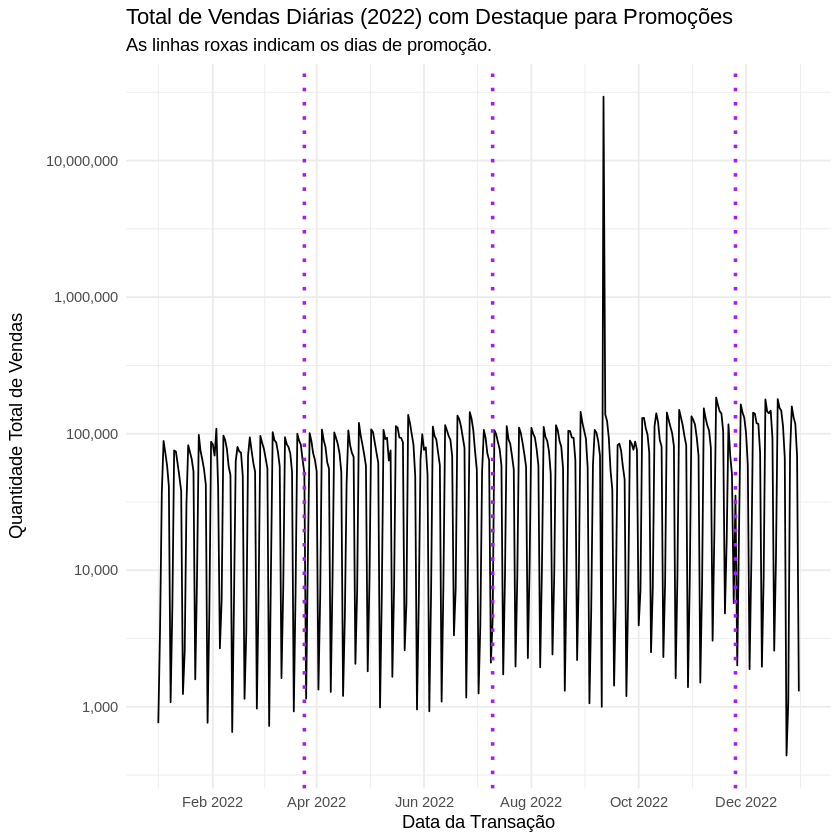

In [ ]:
#Analisando promoções e os impactos nas vendas
datas_promocoes_2022 <- as.Date(c("2022-03-25", "2022-07-10", "2022-11-25"))

ggplot(vendas_diarias |> collect(), aes(x = transaction_date, y = total_quantity)) +
  geom_line() +
  geom_vline(xintercept = datas_promocoes_2022, color = "purple", linetype = "dotted", linewidth = 1) +
  labs(title = "Total de Vendas Diárias (2022) com Destaque para Promoções",
       subtitle = "As linhas roxas indicam os dias de promoção.",
       x = "Data da Transação",
       y = "Quantidade Total de Vendas") +
  scale_y_log10(labels = scales::comma) +
  scale_x_date(date_breaks = "2 months", date_labels = "%b %Y") +
  theme_minimal()

As promoções tem uma queda brusca nas vendas, o que pode não ser benefico, visto que, a princípio deveriam aumentar as vendas, podendo esta realcionadas com ocorrências em finais de semana e/ou feriados, o que já vimos que possue uma queda.

In [ ]:
#hipotese de que a queda nas venda em promoção seja pelo fato de que as mesmas
#tenha ocorrido em finais de semanas ou feriados
promocoes_2022 <- as.Date(c(
  "2022-03-25",
  "2022-07-10",
  "2022-11-25"
))
df_eventos <- vendas_diarias |>
  mutate(is_holiday = ifelse(transaction_date %in% feriados_2022, "Sim", "Não"),
         is_promotion = ifelse(transaction_date %in% promocoes_2022, "Sim", "Não"),
         is_weekend = ifelse(dia_da_semana %in% c(6, 7), "Sim", "Não"))
analise_eventos <- df_eventos |>
  group_by(is_weekend, is_holiday, is_promotion) |>
  summarise(
    media_vendas = mean(total_quantity, na.rm = TRUE),
    n_dias = n(),
    .groups = "drop"
  )

In [ ]:
df_analise_eventos <- analise_eventos |>
  collect()

In [ ]:
print(df_analise_eventos, n = Inf)

# A tibble: 6 × 5
  is_weekend is_holiday is_promotion media_vendas n_dias
  <chr>      <chr>      <chr>               <dbl>  <int>
1 Não        Não        Não                90162.    249
2 Sim        Não        Não               295654.    101
3 Não        Sim        Não                99853.      9
4 Sim        Não        Sim                 4391.      1
5 Não        Não        Sim                43426.      2
6 Sim        Sim        Não                 3445.      3


# Abrindo o data set para amostrar

In [ ]:
# Realizando a abertura do dataset com open_dataset
ds_produtos <- open_dataset("part-00000-tid-6364321654468257203-dc13a5d6-36ae-48c6-a018-37d8cfe34cf6-263-1-c000.snappy.parquet")


In [ ]:
glimpse(ds_produtos)

FileSystemDataset with 1 Parquet file
192,356,316 rows x 8 columns
$ produto      <string> "69753381296344216", "5019314249828979377", "40164042821…
$ categoria    <string> "Package", "Distilled Spirits", "Distilled Spirits", "Di…
$ descricao    <string> "MONDAY NIGHT BREW DON'T CALL IT HOTLANTA 6/4/16 CN", "B…
$ tipos        <string> "Package", "Distilled Spirits", "Distilled Spirits", "Di…
$ label        <string> "In&Out", "Specialty", "Core", NA, "Core", "In&Out", "Di…
$ subcategoria <string> "Red Wine", "Lager / Pilsner", "Lager", "Lager", "Red Wi…
$ marca        <string> "Monday Night Don't Call It Hotlanta", "Barrell Bourbon-…
$ fabricante   <string> "Monday Night Brewing", "Barrell Craft Spirits", "AB Dri…
Call `print()` for full schema details


In [ ]:
install.packages("duckdb")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(arrow)
library(dplyr)
library(tidyverse)
library(lubridate)
library(duckdb)
library(zoo)

ERROR: Error in library(arrow): there is no package called ‘arrow’


In [ ]:
# Realizando a abertura do dataset com open_dataset
ds_transacoes <- open_dataset("part-00000-tid-5196563791502273604-c90d3a24-52f2-4955-b4ec-fb143aae74d8-4-1-c000.snappy.parquet")

# Filtrando por data e coletando uma pequena amostra
ds_filtrado <- ds_transacoes |>
  filter(transaction_date >= as.Date("2022-01-01"),
         transaction_date <= as.Date("2022-12-31"))

# Coletar amostra após trazer um pedaço para R
df_vendas_amostra <- ds_filtrado |>
  collect() |>
  dplyr::sample_frac()


In [ ]:
#Filtrando amostras com valores únicos
pdvs_amostra <- unique(df_vendas_amostra$internal_store_id)
ds_pdv <- open_dataset("part-00000-tid-2779033056155408584-f6316110-4c9a-4061-ae48-69b77c7c8c36-4-1-c000.snappy.parquet")
df_pdv_amostra <- ds_pdv |>
  filter(pdv %in% pdvs_amostra) |>
  collect()|>
  dplyr::sample_frac()

In [ ]:
ds_produtos <- open_dataset("part-00000-tid-6364321654468257203-dc13a5d6-36ae-48c6-a018-37d8cfe34cf6-263-1-c000.snappy.parquet")

In [ ]:
library(duckdb)

In [ ]:
#Conexão
con <- dbConnect(duckdb())

#Sampling via SQL
df_produtos_amostra <- dbGetQuery(con, "
  SELECT *
  FROM read_parquet('part-00000-tid-6364321654468257203-dc13a5d6-36ae-48c6-a018-37d8cfe34cf6-263-1-c000.snappy.parquet')
  USING SAMPLE 6560698
")




In [ ]:
#Fechando conexão, pois, duckdb já cumpriu seu papel.
dbDisconnect(con, shutdown = TRUE)

#Visualizando o contéudo

In [ ]:
glimpse(df_produtos_amostra)

ERROR: Error: object 'df_produtos_amostra' not found


In [ ]:
glimpse(df_pdv_amostra)

ERROR: Error: object 'df_pdv_amostra' not found


In [ ]:
glimpse(df_vendas_amostra)

Rows: 6,560,698
Columns: 11
$ internal_store_id   <chr> "4449174275455595103", "2214752385109818102", "236…
$ internal_product_id <chr> "3883382697746128443", "3154862223819134682", "508…
$ distributor_id      <chr> "4", "4", "9", "6", "4", "9", "5", "4", "4", "5", …
$ transaction_date    <date> 2022-09-12, 2022-02-15, 2022-12-23, 2022-11-08, 2…
$ reference_date      <date> 2022-09-01, 2022-02-01, 2022-12-01, 2022-11-01, 2…
$ quantity            <dbl> 1.00000, 3.00000, 3.00000, 3.00000, 1.00000, 2.000…
$ gross_value         <dbl> 35.6000, 13.8600, 65.2500, 67.0500, 31.6000, 49.85…
$ net_value           <dbl> 32.63157, 12.92955, 65.25000, 66.51000, 29.32024, …
$ gross_profit        <dbl> 10.565574, 4.829549, 18.000000, 18.588001, 8.55824…
$ discount            <dbl> 0.00000, 1.14000, 4.50000, 0.00000, 0.00000, 3.500…
$ taxes               <dbl> 2.968435, 0.930453, 0.000000, 0.540000, 2.279758, …


Realizando algumas Análises visuais para os dados.

In [ ]:
library(scales)


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




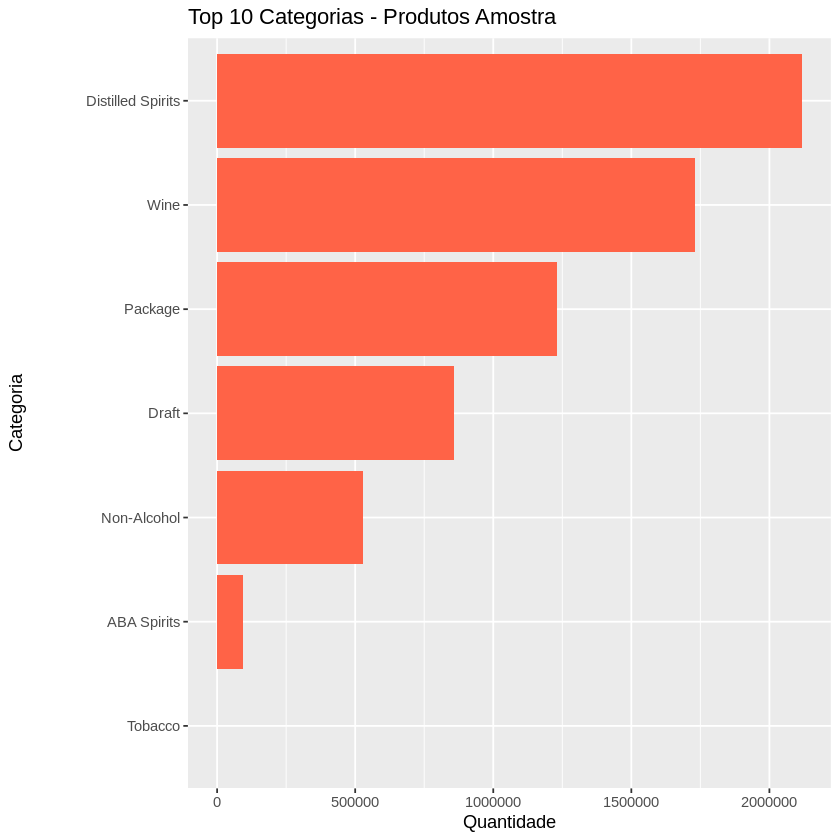

In [ ]:
df_produtos_amostra |>
  count(categoria, sort = TRUE) |>
  head(10) |>
  ggplot(aes(x=reorder(categoria, n), y=n)) +
  geom_col(fill="tomato") +
  coord_flip() +
  labs(title="Top 10 Categorias - Produtos Amostra", x="Categoria", y="Quantidade")

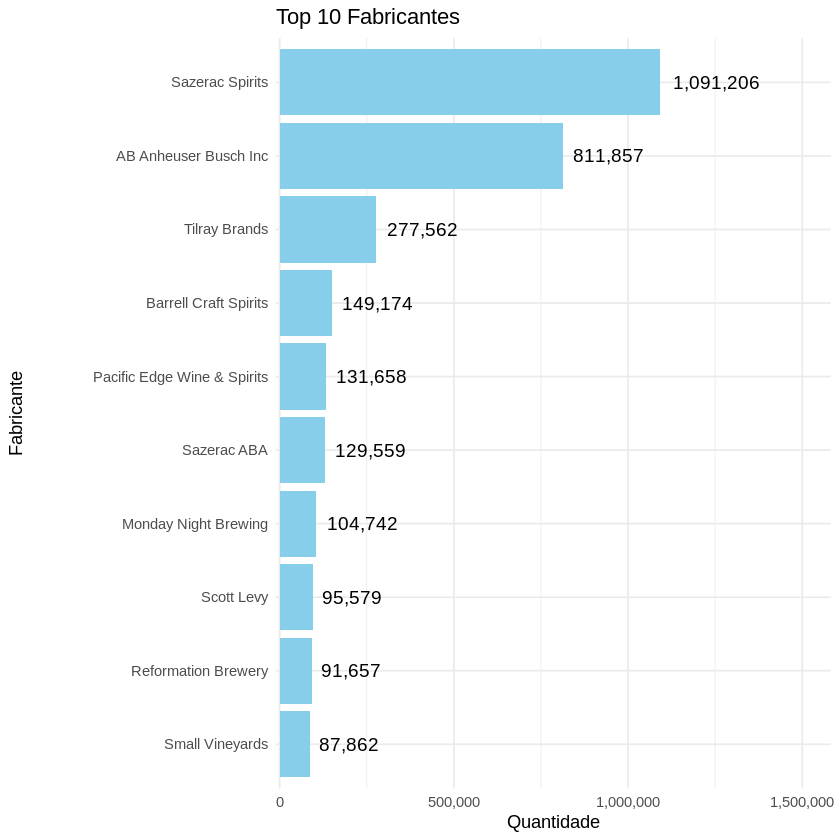

In [ ]:
top_fabricantes <- df_produtos_amostra |>
  count(fabricante, sort = TRUE) |>
  head(10)

ggplot(top_fabricantes, aes(x = reorder(fabricante, n), y = n)) +
  geom_col(fill = "skyblue") +
  geom_text(aes(label = comma(n)),        # Usa formatação número "normal" nas barras!
            hjust = -0.15, color = "black", size = 4) +
  coord_flip() +
  labs(title = "Top 10 Fabricantes", x = "Fabricante", y = "Quantidade") +
  scale_y_continuous(labels = comma,     # Usa também para o eixo!
                     expand = expansion(mult = c(0.01, 0.45))) +
  theme_minimal()

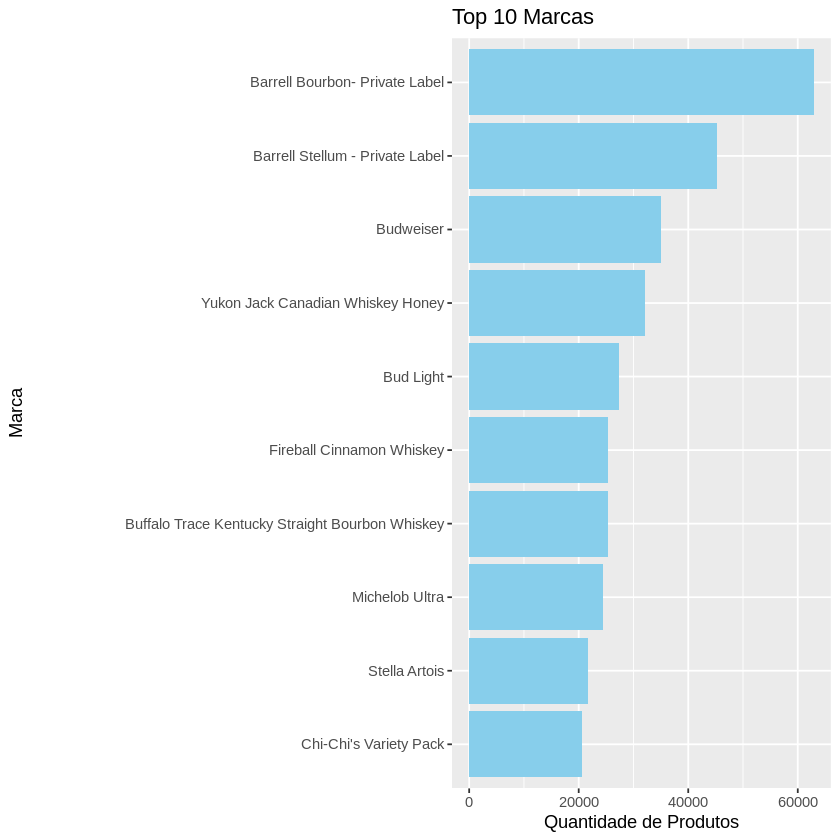

In [ ]:
df_produtos_amostra |>
  count(marca, sort = TRUE) |>
  head(10) |>
  ggplot(aes(x = reorder(marca, n), y = n)) +
  geom_col(fill = "skyblue") +
  coord_flip() +
  labs(title = "Top 10 Marcas", x = "Marca", y = "Quantidade de Produtos")

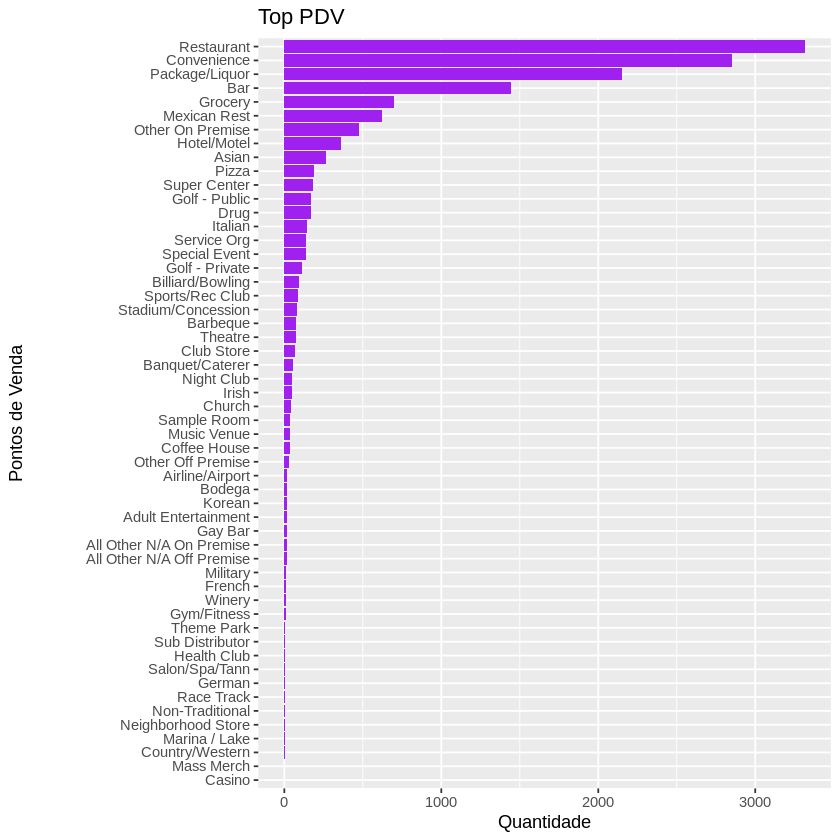

In [ ]:
df_pdv_amostra |>
  count(categoria_pdv, sort = TRUE) |>
  ggplot(aes(x = reorder(categoria_pdv, n), y = n)) +
  geom_col(fill = "purple") +
  labs(title = "Top PDV", x = "Pontos de Venda", y = "Quantidade")+
  coord_flip()

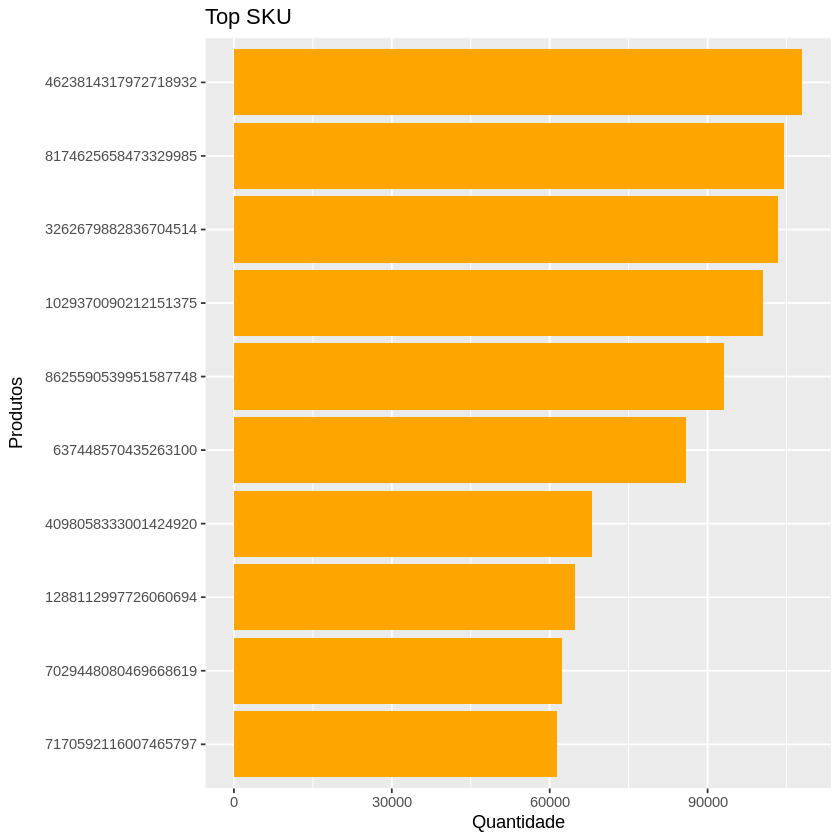

In [ ]:
df_vendas_amostra |>
  count(internal_product_id, sort = TRUE) |>
  slice_head(n = 10) |>
  ggplot(aes(x = reorder(internal_product_id, n), y = n)) +
  geom_col(fill = "orange") +
  labs(title = "Top SKU", x = "Produtos", y = "Quantidade")+
  coord_flip()

# Agregação de PDV/SKU

In [ ]:
library(dplyr)
df_produtos_amostra |>
  count(produto) |>
  summarise(max_n = max(n), distintos = n())

df_vendas_amostra |>
  count(internal_product_id) |>
  summarise(max_n = max(n), distintos = n())


max_n,distintos
<int>,<int>
3318,7092


max_n,distintos
<int>,<int>
108018,7092


In [ ]:
produtos_unique <- df_produtos_amostra |>
  group_by(produto) |>
  summarise(
    categoria = first(na.omit(categoria)),
    descricao = first(na.omit(descricao)),
    tipos = first(na.omit(tipos)),
    label = first(na.omit(label)),
    subcategoria = first(na.omit(subcategoria)),
    marca = first(na.omit(marca)),
    fabricante = first(na.omit(fabricante)),
    .groups = "drop"
  )


In [ ]:
df_vendas_enriquecida <- df_vendas_amostra |>
  left_join(produtos_unique, by = c("internal_product_id" = "produto"))


In [ ]:
df_vendas_final <- df_vendas_enriquecida |>
  left_join(df_pdv_amostra, by = c("internal_store_id" = "pdv"))


In [ ]:
write.csv(df_vendas_final, "/content/Arquivos/df_vendas_final.csv", row.names = FALSE)

#Explorando com gráficos

In [ ]:
df_vendas_final |>
  group_by(categoria) |>
  summarise(qtd_vendida = sum(quantity, na.rm = TRUE)) |>
  arrange(desc(qtd_vendida)) |>
  ggplot(aes(x = reorder(categoria, qtd_vendida), y = qtd_vendida)) +
  geom_col(fill = "red") +
  coord_flip() +
  scale_y_continuous(labels = comma) +
  labs(title = "Quantidade vendida por categoria",
       x = "Categoria",
       y = "Quantidade vendida")


ERROR: Error: object 'comma' not found


In [ ]:
glimpse(df_vendas_final)

Rows: 6,560,698
Columns: 21
$ internal_store_id   <chr> "4449174275455595103", "2214752385109818102", "236…
$ internal_product_id <chr> "3883382697746128443", "3154862223819134682", "508…
$ distributor_id      <chr> "4", "4", "9", "6", "4", "9", "5", "4", "4", "5", …
$ transaction_date    <date> 2022-09-12, 2022-02-15, 2022-12-23, 2022-11-08, 2…
$ reference_date      <date> 2022-09-01, 2022-02-01, 2022-12-01, 2022-11-01, 2…
$ quantity            <dbl> 1.00000, 3.00000, 3.00000, 3.00000, 1.00000, 2.000…
$ gross_value         <dbl> 35.6000, 13.8600, 65.2500, 67.0500, 31.6000, 49.85…
$ net_value           <dbl> 32.63157, 12.92955, 65.25000, 66.51000, 29.32024, …
$ gross_profit        <dbl> 10.565574, 4.829549, 18.000000, 18.588001, 8.55824…
$ discount            <dbl> 0.00000, 1.14000, 4.50000, 0.00000, 0.00000, 3.500…
$ taxes               <dbl> 2.968435, 0.930453, 0.000000, 0.540000, 2.279758, …
$ categoria           <chr> "Package", "Wine", "Non-Alcohol", "Package", "Pack…
$ descricao 

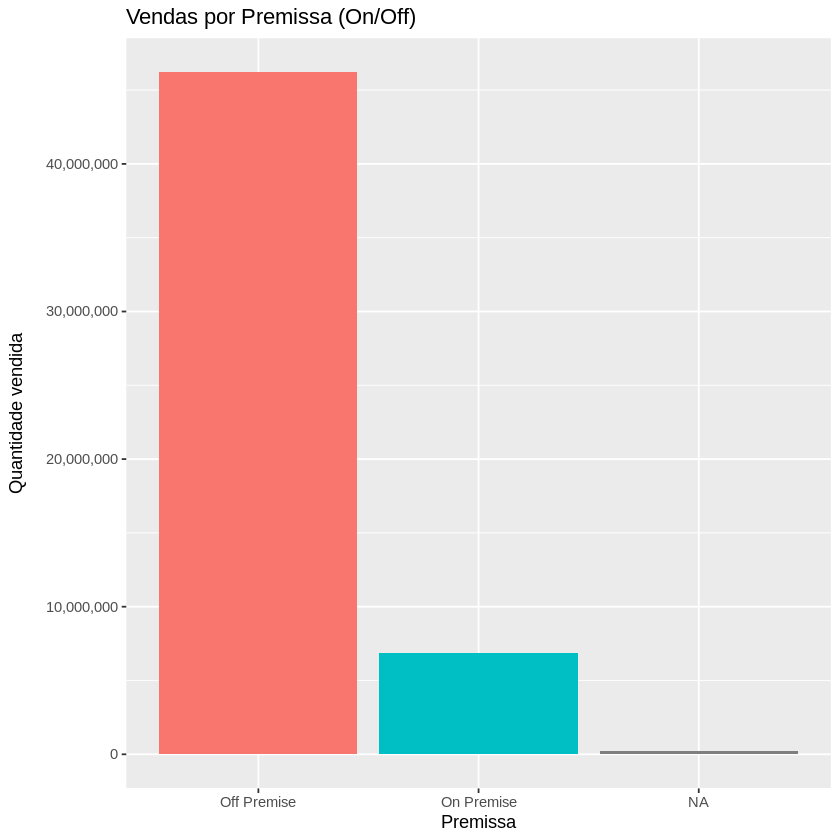

In [ ]:
df_vendas_final |>
  group_by(premise) |>
  summarise(qtd_vendida = sum(quantity, na.rm = TRUE)) |>
  ggplot(aes(x = premise, y = qtd_vendida, fill = premise)) +
  geom_col(show.legend = FALSE) +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Vendas por Premissa (On/Off)", x = "Premissa", y = "Quantidade vendida")

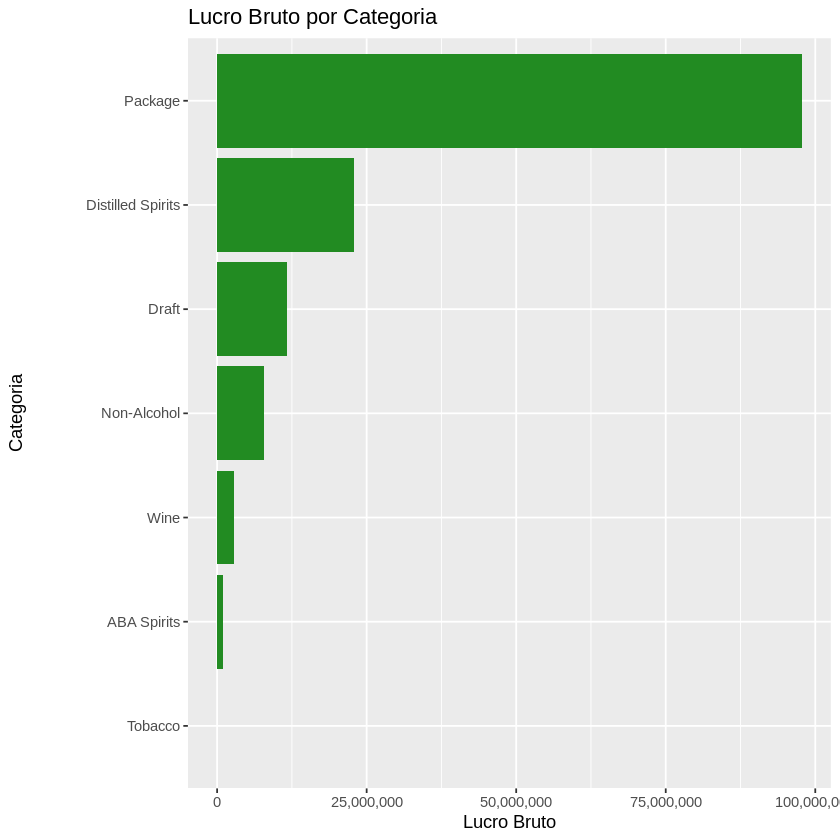

In [ ]:
df_vendas_final |>
  group_by(categoria) |>
  summarise(lucro_bruto = sum(gross_profit, na.rm = TRUE)) |>
  arrange(desc(lucro_bruto)) |>
  ggplot(aes(x = reorder(categoria, lucro_bruto), y = lucro_bruto)) +
  geom_col(fill = "forestgreen") +
  coord_flip() +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Lucro Bruto por Categoria", x = "Categoria", y = "Lucro Bruto")

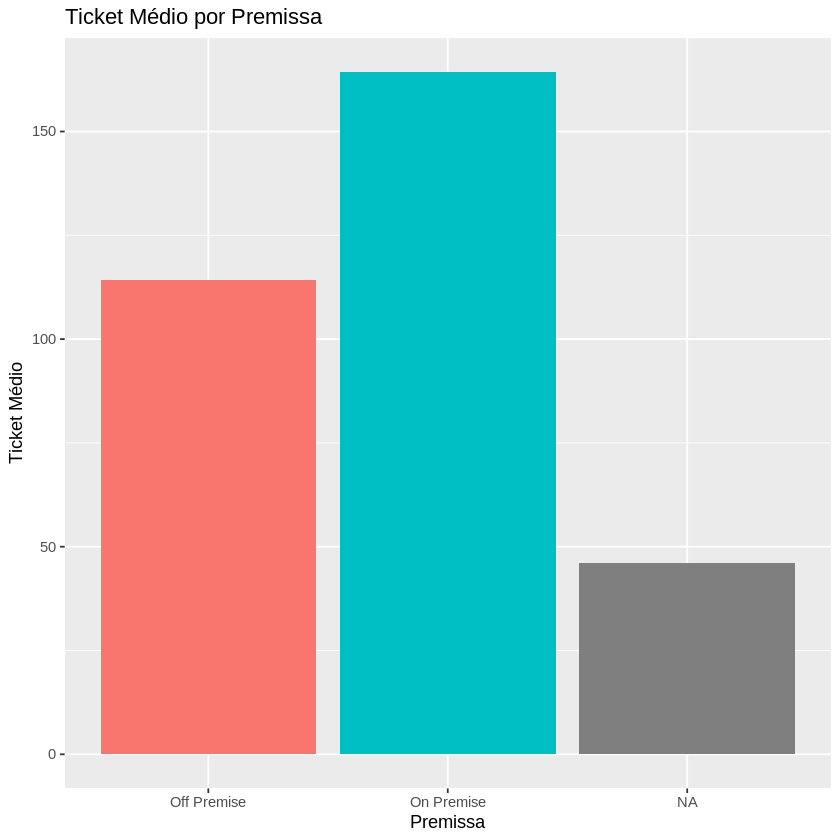

In [ ]:
df_vendas_final |>
  group_by(premise) |>
  summarise(ticket_medio = mean(net_value, na.rm = TRUE)) |>
  ggplot(aes(x = premise, y = ticket_medio, fill = premise)) +
  geom_col(show.legend = FALSE) +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Ticket Médio por Premissa", x = "Premissa", y = "Ticket Médio")


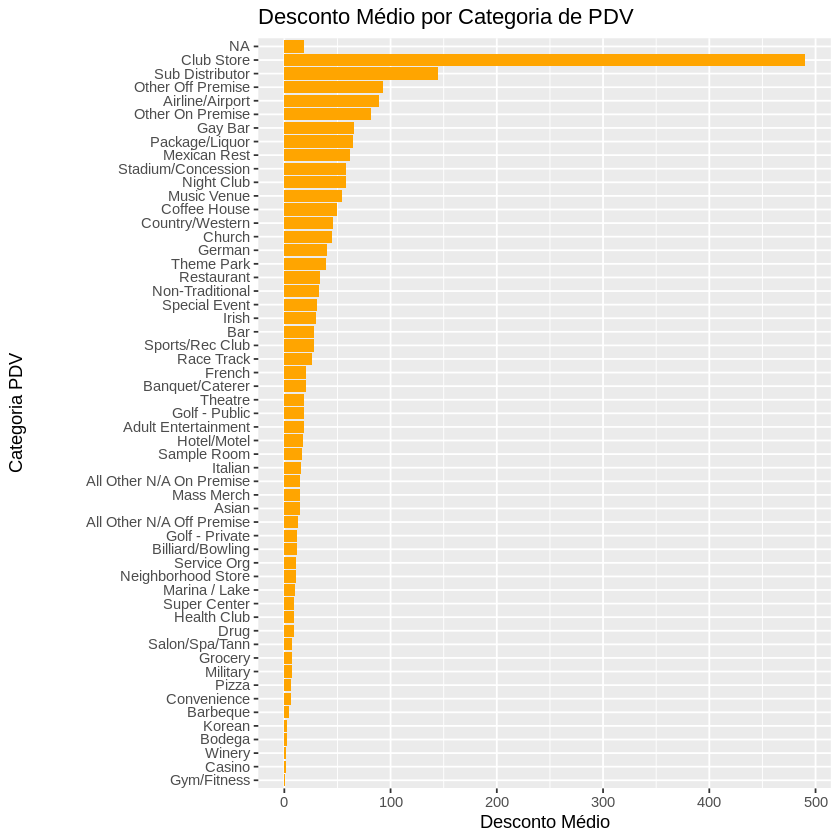

In [ ]:
df_vendas_final |>
  group_by(categoria_pdv) |>
  summarise(desconto_medio = mean(discount, na.rm = TRUE)) |>
  arrange(desc(desconto_medio)) |>
  ggplot(aes(x = reorder(categoria_pdv, desconto_medio), y = desconto_medio)) +
  geom_col(fill = "orange") +
  coord_flip() +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Desconto Médio por Categoria de PDV", x = "Categoria PDV", y = "Desconto Médio")


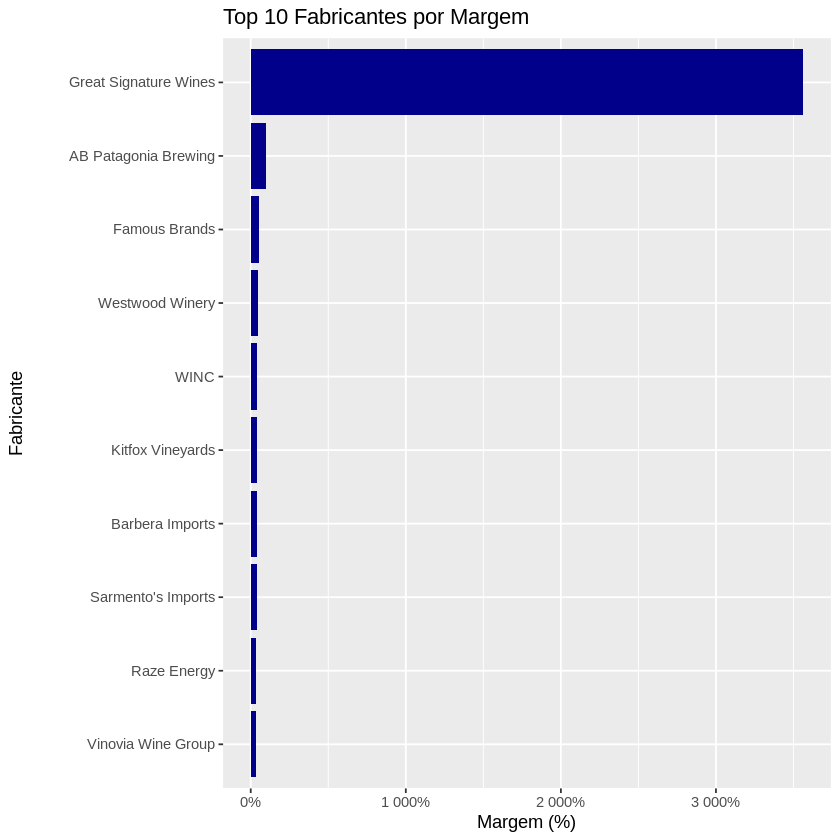

In [ ]:
df_vendas_final |>
  group_by(fabricante) |>
  summarise(margem = sum(gross_profit, na.rm = TRUE) / sum(net_value, na.rm = TRUE)) |>
  arrange(desc(margem)) |>
  slice_head(n = 10) |>
  ggplot(aes(x = reorder(fabricante, margem), y = margem)) +
  geom_col(fill = "darkblue") +
  coord_flip() +
  scale_y_continuous(labels = scales::percent_format(accuracy = 1)) +
  labs(title = "Top 10 Fabricantes por Margem", x = "Fabricante", y = "Margem (%)")


`summarise()` has grouped output by 'mes'. You can override using the `.groups`
argument.
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


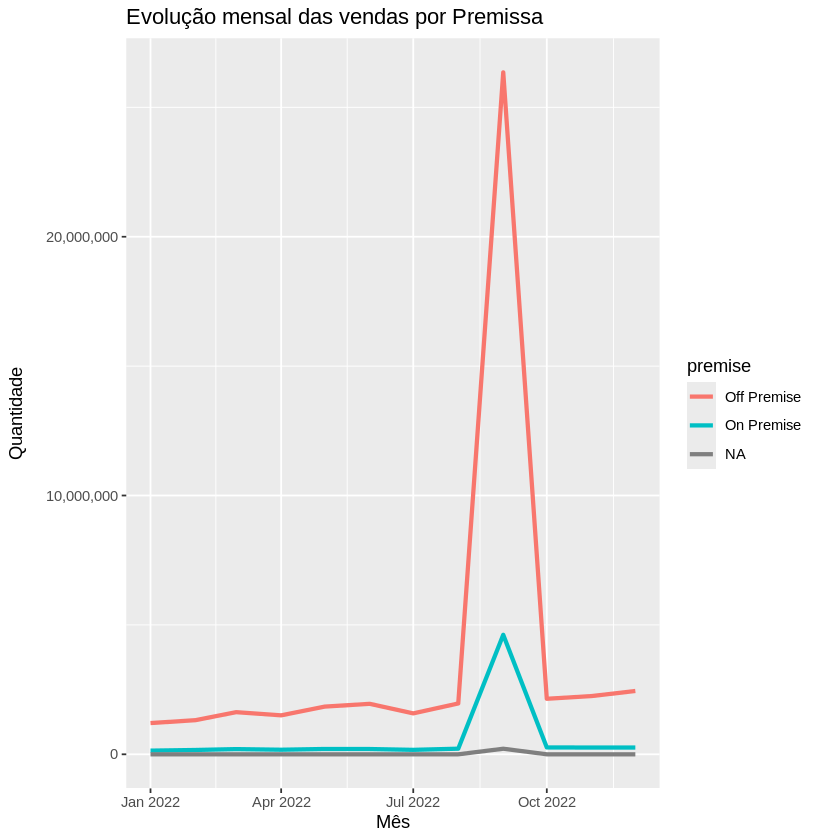

In [ ]:
library(lubridate)
df_vendas_final |>
  mutate(mes = floor_date(transaction_date, "month")) |>
  group_by(mes, premise) |>
  summarise(qtd_vendida = sum(quantity, na.rm = TRUE)) |>
  ggplot(aes(x = mes, y = qtd_vendida, color = premise)) +
  geom_line(size = 1.2) +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Evolução mensal das vendas por Premissa", x = "Mês", y = "Quantidade")


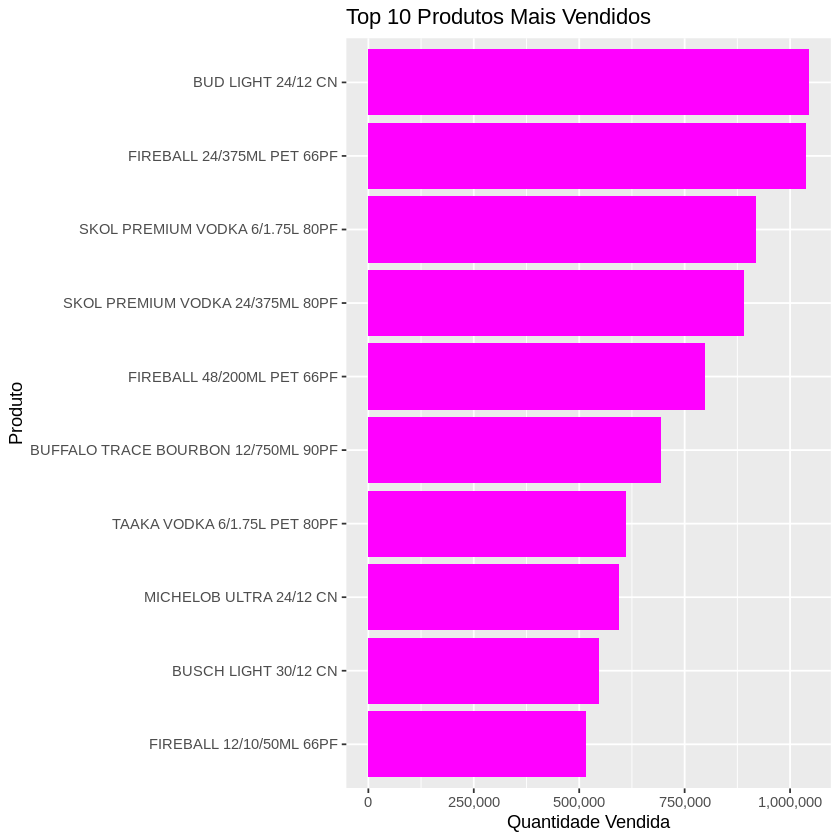

In [ ]:
df_vendas_final |>
  group_by(descricao) |>
  summarise(qtd_vendida = sum(quantity, na.rm = TRUE)) |>
  arrange(desc(qtd_vendida)) |>
  slice_head(n = 10) |>
  ggplot(aes(x = reorder(descricao, qtd_vendida), y = qtd_vendida)) +
  geom_col(fill = "magenta") +
  coord_flip() +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Top 10 Produtos Mais Vendidos", x = "Produto", y = "Quantidade Vendida")


In [ ]:
df_vendas_final |>
  group_by(categoria, categoria_pdv) |>
  summarise(qtd_vendida = sum(quantity, na.rm = TRUE)) |>
  ggplot(aes(x = categoria, y = categoria_pdv, fill = qtd_vendida)) +
  geom_tile() +
  scale_fill_gradient(low = "white", high = "red", labels = scales::comma) +
  labs(title = "Heatmap: Vendas por Categoria/PDV", x = "Categoria", y = "Categoria PDV")


#Etapa 2

In [ ]:
install.packages("arrow") #instalando biblioteca de leitura


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘assertthat’




In [ ]:
install.packages("xgboost")
install.packages("lightgbm")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("caret")
install.packages("tidyverse") #instalando biblioteca de manipulação
install.packages ("forecast")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
# Definindo o caminho para o arquivo zip
zip_file <- "/content/df_vendas_final.zip"
zip_file1 <- "/content/df.zip"

# Definindo o diretório de destino para a extração
dest_dir <- "/content/"

# Extraindo o conteúdo do arquivo zip
unzip(zip_file, exdir = dest_dir)
unzip(zip_file1, exdir = dest_dir)

In [ ]:
library(arrow)
library(dplyr)
library(lubridate)
#library(duckdb)
library(zoo)
library(tidyverse)
library(ggplot2)
library(shiny)
library(forecast)
library(forcats)
library(scales)
library(xgboost)
library(caret)
library(lightgbm)


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following object is masked from ‘package:arrow’:

    duration


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats 1.0.0     ✔ stringr 1.5.2
✔ ggplot2 4.0.0     ✔ tibble  3.3.0
✔ purrr   1.1.0     ✔ tidyr   1.3.1
✔ readr   2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::duration() masks arrow::duration()
✖ dplyr::filter()       masks stats::filter()
✖ dp

In [ ]:
df_pdv_amostra1 <- read.csv("/content/df_pdv_amostra.csv")

In [ ]:
df_produtos_amostra1 <- read.csv("/content/df_produtos_amostra.csv")

In [ ]:
df_vendas_amostra1 <- read.csv("/content/df_vendas_amostra.csv")

In [ ]:
df_semanal <- read.csv("/content/df_semanal.csv")

In [ ]:
glimpse(df_semanal)

Rows: 6,246,907
Columns: 10
$ internal_store_id   <dbl> 1.638679e+14, 1.638679e+14, 1.638679e+14, 1.638679…
$ internal_product_id <dbl> 2.169858e+17, 2.169858e+17, 4.830993e+17, 1.023599…
$ ano                 <dbl> 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 20…
$ semana_ano          <dbl> 18, 34, 18, 18, 34, 34, 18, 34, 34, 18, 18, 34, 18…
$ qntd_vendida        <dbl> 1, 2, 6, 1, 2, 1, 2, 2, 1, 1, 1, 1, 6, 1, 1, 1, 1,…
$ desconto_medio      <dbl> 0.00, 56.26, 12.00, 0.00, 0.00, 0.00, 0.00, 0.00, …
$ lucro_medio         <dbl> 8.277823, -39.704353, 14.291807, 15.460824, 30.921…
$ lag1                <dbl> NA, 1, NA, NA, 1, NA, NA, 2, NA, NA, NA, 1, NA, NA…
$ lag2                <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ media_movel3        <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…


Utilizando o XGboost para fazer a previsão.

In [ ]:
# Dividir o df_semanal em treino e teste com base no ano e semana
train_data1 <- df_semanal |> filter(ano == 2022 & semana_ano <= 48)
test_data1  <- df_semanal |> filter(ano == 2022 & semana_ano > 48)

In [ ]:
# Definir as features (variáveis preditoras) e a variável alvo
featnames <- c("desconto_medio", "lucro_medio", "lag1", "lag2", "media_movel3") # Features baseadas em df_semanal
train_data1$target <- train_data1$qntd_vendida  # Definir qntd_vendida como variável alvo

In [ ]:
dummies <- dummyVars(~ ., data = train_data1[, featnames], fullRank = TRUE)
X_train <- predict(dummies, train_data1)
y_train <- train_data1$target

In [ ]:
# Selecionando as colunas de features, a coluna alvo e as colunas de identificação em test_data
test_data_filtered <- test_data1 |> select(all_of(featnames), qntd_vendida, internal_store_id, internal_product_id, ano, semana_ano)

# Remove linhas com NA nas colunas de features ou na variável alvo
test_data_filtered <- test_data_filtered |> na.omit()

# Usar dummyVars nas features filtradas
dummies_tst <- dummyVars(~ ., data = test_data_filtered[, featnames], fullRank = TRUE)
X_test <- predict(dummies_tst, test_data_filtered)

# A variável alvo y_test agora corresponde às linhas filtradas
y_test <- test_data_filtered$qntd_vendida # Corrigido de quantity para qntd_vendida

In [ ]:
dtrain <- xgb.DMatrix(data = X_train, label = y_train)
dtest  <- xgb.DMatrix(data = X_test)

In [ ]:
params <- list(objective = "reg:squarederror", eta = 0.1, max_depth = 6)
xgb_model <- xgb.train(params, dtrain, nrounds = 100, verbose = 1)


In [ ]:
y_pred <- predict(xgb_model, dtest)
caret::postResample(pred = y_pred, obs = y_test)

RMSE  Rsquared       MAE 
5.8308404 0.8276692 1.0270533

In [ ]:
MAPE <- mean(abs((y_test - y_pred) / pmax(1, abs(y_test)))) * 100  # Protege de divisão por zero!
sMAPE <- mean(2 * abs(y_pred - y_test) / (abs(y_test) + abs(y_pred) + 1e-8)) * 100  # +1e-8 previne divisão zero

sprintf("MAPE: %.2f%%", MAPE)
sprintf("sMAPE: %.2f%%", sMAPE)


[1] "MAPE: 22.27%"

[1] "sMAPE: 21.61%"

In [ ]:
# Criando df_submição combinando informações de test_data_filtered e y_pred
df_submit <- test_data_filtered |> # Usar test_data_filtered em vez de test_data
  select(internal_store_id, internal_product_id, ano, semana_ano) |>
  mutate(quantidade = y_pred) |>
  rename(pdv = internal_store_id, produto = internal_product_id, semana = semana_ano)


# Convertendo previsões para inteiro (arredondando ou truncando) e semana para inteiro
df_submit <- df_submit |>
  mutate(
    quantidade = pmax(0, round(quantidade)),  # Não deixa previsão negativa!
    # Removida a conversão para as.integer() para pdv e produto
    semana = as.integer(semana)
  )

# Reordenando as colunas na ordem exigida
df_submit <- df_submit |>
  select(semana, pdv, produto, quantidade)

# Ajustando a opção de exibição para desativar a notação científica
options(scipen = 999)

# Exibindo as primeiras linhas do df_submit
print(head(df_submit))

   semana              pdv            produto quantidade
7      50 2039259415232404 200407080435025888          1
8      51 2039259415232404 347520348779130816          1
9      49 2039259415232404 470856825659366336          5
10     51 2039259415232404 470856825659366336          2
11     52 2039259415232404 470856825659366336          2
12     51 2039259415232404 637448570435263104          1


#Prevendo

Teste com features

In [ ]:
# Juntar dados de produto ao df_semanal
# Certifique-se de que df_semanal e df_produtos_amostra existem no ambiente

# Selecionar apenas as colunas necessárias de df_produtos_amostra para a junção
df_produtos_categoria <- df_produtos_amostra1 |>
  dplyr::select(produto, categoria) |>
  dplyr::distinct(produto, .keep_all = TRUE) # Garantir que cada produto apareça apenas uma vez

# Realizar a junção left_join de df_semanal com df_produtos_categoria
# Usando internal_product_id de df_semanal e produto de df_produtos_categoria
df_semanal_com_categoria <- df_semanal |>
  dplyr::left_join(df_produtos_categoria, by = c("internal_product_id" = "produto"))

# Exibindo as primeiras linhas do novo DataFrame com a coluna categoria
print(head(df_semanal_com_categoria))

  internal_store_id internal_product_id  ano semana_ano qntd_vendida
1      1.638679e+14        2.169858e+17 2022         18            1
2      1.638679e+14        2.169858e+17 2022         34            2
3      1.638679e+14        4.830993e+17 2022         18            6
4      1.638679e+14        1.023599e+18 2022         18            1
5      1.638679e+14        1.023599e+18 2022         34            2
6      1.638679e+14        1.168465e+18 2022         34            1
  desconto_medio lucro_medio lag1 lag2 media_movel3         categoria
1           0.00    8.277823   NA   NA           NA              <NA>
2          56.26  -39.704353    1   NA           NA              <NA>
3          12.00   14.291807   NA   NA           NA              Wine
4           0.00   15.460824   NA   NA           NA Distilled Spirits
5           0.00   30.921648    1   NA           NA Distilled Spirits
6           0.00    9.299999   NA   NA           NA           Package


In [ ]:
# Codificar IDs
# Certifique-se de que df_semanal_com_categoria (resultado do Passo 2) existe

df_semanal_codificado <- df_semanal_com_categoria |>
  dplyr::mutate(
    pdv_int = as.integer(factor(internal_store_id)), # Codificar PDV para inteiro
    sku_int = as.integer(factor(internal_product_id)) # Codificar SKU para inteiro
  )

# Exibir as primeiras linhas do DataFrame com os IDs codificados
print(head(df_semanal_codificado))

  internal_store_id internal_product_id  ano semana_ano qntd_vendida
1      1.638679e+14        2.169858e+17 2022         18            1
2      1.638679e+14        2.169858e+17 2022         34            2
3      1.638679e+14        4.830993e+17 2022         18            6
4      1.638679e+14        1.023599e+18 2022         18            1
5      1.638679e+14        1.023599e+18 2022         34            2
6      1.638679e+14        1.168465e+18 2022         34            1
  desconto_medio lucro_medio lag1 lag2 media_movel3         categoria pdv_int
1           0.00    8.277823   NA   NA           NA              <NA>       1
2          56.26  -39.704353    1   NA           NA              <NA>       1
3          12.00   14.291807   NA   NA           NA              Wine       1
4           0.00   15.460824   NA   NA           NA Distilled Spirits       1
5           0.00   30.921648    1   NA           NA Distilled Spirits       1
6           0.00    9.299999   NA   NA           

In [ ]:
# Calcular média histórica PDV/SKU
# Certifique-se de que df_semanal_codificado (resultado do Passo 3) existe

df_semanal_hist_pdvsku <- df_semanal_codificado |>
  arrange(internal_store_id, internal_product_id, ano, semana_ano) |> # Garantir ordenação temporal
  group_by(internal_store_id, internal_product_id) |>
  mutate(
    media_hist_pdvsku = lag(cummean(qntd_vendida), default = mean(qntd_vendida, na.rm = TRUE)) # Média acumulada defasada
  ) |>
  dplyr::ungroup()

# Exibir as primeiras linhas do DataFrame com a nova feature
print(head(df_semanal_hist_pdvsku))

# A tibble: 6 × 14
  internal_store_id internal_product_id   ano semana_ano qntd_vendida
              <dbl>               <dbl> <int>      <int>        <dbl>
1           1.64e14             2.17e17  2022         18            1
2           1.64e14             2.17e17  2022         34            2
3           1.64e14             4.83e17  2022         18            6
4           1.64e14             1.02e18  2022         18            1
5           1.64e14             1.02e18  2022         34            2
6           1.64e14             1.17e18  2022         34            1
# ℹ 9 more variables: desconto_medio <dbl>, lucro_medio <dbl>, lag1 <dbl>,
#   lag2 <dbl>, media_movel3 <dbl>, categoria <chr>, pdv_int <int>,
#   sku_int <int>, media_hist_pdvsku <dbl>


In [ ]:
# Calcular média histórica Categoria
# Certifique-se de que df_semanal_hist_pdvsku (resultado do Passo 4) existe e contém a coluna 'categoria'

df_semanal_hist_categoria <- df_semanal_hist_pdvsku |>
  arrange(categoria, ano, semana_ano) |> # Garantir ordenação temporal por categoria
  group_by(categoria) |>
  mutate(
    media_hist_categoria = lag(cummean(qntd_vendida), default = mean(qntd_vendida, na.rm = TRUE)) # Média acumulada defasada
  ) |>
  ungroup()

# Exibir as primeiras linhas do DataFrame com a nova feature
print(head(df_semanal_hist_categoria))

# A tibble: 6 × 15
  internal_store_id internal_product_id   ano semana_ano qntd_vendida
              <dbl>               <dbl> <int>      <int>        <dbl>
1           1.05e16             2.41e18  2022          1            2
2           1.09e16             4.93e18  2022          1            3
3           1.09e16             5.78e18  2022          1            2
4           1.09e16             6.09e18  2022          1           10
5           1.09e16             7.06e18  2022          1            1
6           2.91e16             2.41e18  2022          1            1
# ℹ 10 more variables: desconto_medio <dbl>, lucro_medio <dbl>, lag1 <dbl>,
#   lag2 <dbl>, media_movel3 <dbl>, categoria <chr>, pdv_int <int>,
#   sku_int <int>, media_hist_pdvsku <dbl>, media_hist_categoria <dbl>


In [ ]:
# Dividir o df_semanal_hist_categoria em novos conjuntos de treino e teste (v2) com base no ano e semana
train_data_v2 <- df_semanal_hist_categoria |> filter(ano == 2022 & semana_ano <= 48)
test_data_v2  <- df_semanal_hist_categoria |> filter(ano == 2022 & semana_ano > 48)

# Exibir as dimensões dos novos conjuntos de dados para verificar
print(paste("Dimensões de train_data_v2:", dim(train_data_v2)[1], "linhas,", dim(train_data_v2)[2], "colunas"))
print(paste("Dimensões de test_data_v2:", dim(test_data_v2)[1], "linhas,", dim(test_data_v2)[2], "colunas"))

[1] "Dimensões de train_data_v2: 5759071 linhas, 15 colunas"
[1] "Dimensões de test_data_v2: 487836 linhas, 15 colunas"


In [ ]:
# Definir as features (variáveis preditoras) e a variável alvo
featnames <- c(
  "desconto_medio",
  "lucro_medio",
  "lag1", "lag2",
  "media_movel3",
  "media_hist_pdvsku",          # Corrigido de media_hist_pdvsu para media_hist_pdvsku
  "media_hist_categoria",      # Média histórica Categoria
  "pdv_int",                   # Identificador PDV codificado (ou use dummies se não forem muitos!)
  "sku_int"                    # Identificador SKU codificado
)

# Assumindo que train_data já tem a coluna 'qntd_vendida' como alvo
# train_data$target <- train_data$qntd_vendida # Esta linha pode ser necessária dependendo do fluxo anterior

In [ ]:
# Preparar features de treino e variável alvo para v2
# Selecionar apenas as colunas de features e a variável alvo do train_data_v2
train_data_v2_filtered <- train_data_v2 |> select(all_of(featnames), qntd_vendida)

# Remover linhas com NA nas colunas de features ou na variável alvo (se houver)
train_data_v2_filtered <- na.omit(train_data_v2_filtered)

# Usar dummyVars nas features filtradas do treino
dummies_v2 <- dummyVars(~ ., data = train_data_v2_filtered[, featnames], fullRank = TRUE)
X_train_v2 <- predict(dummies_v2, train_data_v2_filtered)

# A variável alvo y_train_v2
y_train_v2 <- train_data_v2_filtered$qntd_vendida

# Preparar features de teste e variável alvo para v2, removendo NAs
test_data_v2_filtered <- test_data_v2 |> select(all_of(featnames), qntd_vendida, internal_store_id, internal_product_id, ano, semana_ano)

# Remover linhas com NA nas colunas de features ou na variável alvo
test_data_v2_filtered <- test_data_v2_filtered |> na.omit()

# Usar dummyVars nas features filtradas do teste
dummies_tst_v2 <- dummyVars(~ ., data = test_data_v2_filtered[, featnames], fullRank = TRUE)
X_test_v2 <- predict(dummies_tst_v2, test_data_v2_filtered)

# A variável alvo y_test_v2 agora corresponde às linhas filtradas
y_test_v2 <- test_data_v2_filtered$qntd_vendida

In [ ]:
# Criar objetos xgb.DMatrix para v2
dtrain_v2 <- xgb.DMatrix(data = X_train_v2, label = y_train_v2)
dtest_v2  <- xgb.DMatrix(data = X_test_v2)

In [ ]:
# Treinar modelo XGBoost para v2
params <- list(objective = "reg:squarederror", eta = 0.1, max_depth = 6) # Pode ajustar hiperparâmetros
xgb_model_v2 <- xgb.train(params, dtrain_v2, nrounds = 100, verbose = 1) # Pode ajustar nrounds

In [ ]:
# Fazer previsões com o modelo v2
y_pred_v2 <- predict(xgb_model_v2, dtest_v2)


In [ ]:
# Avaliar modelo v2
evaluation_metrics_v2 <- caret::postResample(pred = y_pred_v2, obs = y_test_v2)
print(evaluation_metrics_v2)

     RMSE  Rsquared       MAE 
5.3386393 0.8596336 0.7088534 


Apesar do processamento um pouco mais lento, o resultado final, é bem promissor.

In [ ]:
# Calcular MAPE e sMAPE para v2
MAPE_v2 <- mean(abs((y_test_v2 - y_pred_v2) / pmax(1, abs(y_test_v2)))) * 100  # Protege de divisão por zero!
sMAPE_v2 <- mean(2 * abs(y_pred_v2 - y_test_v2) / (abs(y_test_v2) + abs(y_pred_v2) + 1e-8)) * 100  # +1e-8 previne divisão zero

sprintf("MAPE v2: %.2f%%", MAPE_v2)
sprintf("sMAPE v2: %.2f%%", sMAPE_v2)

[1] "MAPE v2: 15.19%"

[1] "sMAPE v2: 15.73%"

In [ ]:
# Gerar o df_submit_v2
df_submit_v2 <- test_data_v2_filtered |>
  select(internal_store_id, internal_product_id, ano, semana_ano) |>
  mutate(quantidade = y_pred_v2) |>
  rename(pdv = internal_store_id, produto = internal_product_id, semana = semana_ano) |>
  mutate(
    quantidade = pmax(0, round(quantidade)),
    semana = as.integer(semana)
  ) |>
  select(semana, pdv, produto, quantidade)

# Agrupar por semana, pdv e produto, e somar quantidade
previsao_por_semana_pdv_produto <- df_submit_v2 |>
  group_by(semana, pdv, produto) |>
  summarise(
    quantidade = sum(quantidade, na.rm = TRUE),
    .groups = "drop"
  )

# Desativar notação científica
options(scipen = 999)

# Exibir resultado
print(previsao_por_semana_pdv_produto)


# A tibble: 428,295 × 4
   semana     pdv produto quantidade
    <int>   <dbl>   <dbl>      <dbl>
 1     49 2.04e15 4.71e17          5
 2     49 2.04e15 7.45e17         16
 3     49 2.04e15 1.15e18          5
 4     49 2.04e15 1.27e18         10
 5     49 2.04e15 1.47e18         11
 6     49 2.04e15 1.66e18          5
 7     49 2.04e15 2.53e18          9
 8     49 2.04e15 3.89e18         11
 9     49 2.04e15 5.42e18         12
10     49 2.04e15 6.64e18          5
# ℹ 428,285 more rows


In [ ]:
write.csv(df_submit_v2, "/content/previsao_por_semana_pdv_produto.csv", row.names = FALSE)